## Clean the csv file before running this script
1. Delete the first column of 'variance-of-perceived-pivotality'

Once done, enter the name of the file below

Questions we are trying to answer with this script:
1. How much does the percentage of positive payoffs with variance of p?
2. Does putting a cost on the votes significantly change the payoff of higher pivotalities?

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('QVoting-DynamicPivotality-normalized-p-table.csv')

df = df[~ df["payoff-include-votes-cost?"]]

MeanVar = df[["marginal-pivotality", "variance-of-perceived-pivotality", "payoff-include-votes-cost?"]].drop_duplicates()
MeanVar = pd.concat([MeanVar, pd.DataFrame(columns = ['percentage of positive payoff', 'number of positive payoff', 'number of runs'])], axis = 1, join = 'outer')
MeanVar['number of positive payoff'] = 0
MeanVar['number of runs'] = 0
MeanVar = MeanVar.sort_values('marginal-pivotality')

In [2]:
EditingRowIndex = 0
for index, row in df.iterrows():
    TargetIndices = MeanVar[(MeanVar['marginal-pivotality'] == row ['marginal-pivotality'])
                              & (MeanVar['variance-of-perceived-pivotality'] == row ['variance-of-perceived-pivotality'])].index
    EditingRowIndex = TargetIndices[0]
    MeanVar.loc[EditingRowIndex ,'number of runs'] += 1
    MeanVar.loc[EditingRowIndex, 'number of positive payoff'] += int(float(row['payoff'])>=0)
    MeanVar.loc[EditingRowIndex, 'percentage of positive payoff'] = MeanVar.loc[EditingRowIndex, 'number of positive payoff'] / MeanVar.loc[EditingRowIndex, 'number of runs'] * 100
MeanVar

,marginal-pivotality,variance-of-perceived-pivotality,payoff-include-votes-cost?,percentage of positive payoff,number of positive payoff,number of runs
0,0.15,0.0010,False,91.9,919,1000
59999,0.15,0.0130,False,79.5,795,1000
55000,0.15,0.0120,False,79.8,798,1000
49998,0.15,0.0110,False,78.3,783,1000
45000,0.15,0.0100,False,81.7,817,1000
69997,0.15,0.0150,False,79.6,796,1000
39997,0.15,0.0090,False,80.2,802,1000
34997,0.15,0.0080,False,82.4,824,1000
29999,0.15,0.0070,False,84.5,845,1000
24996,0.15,0.0060,False,84.2,842,1000


In [3]:
import matplotlib.pyplot as plt

currentPivotality = 0
variances = []
payoffs = []
for index, row in MeanVar.iterrows():
    if row['marginal-pivotality'] != currentPivotality:
        if currentPivotality:
            plt.scatter(variances, payoffs)
            plt.axis([0, max(variances) * 1.1, 65, 100])
            plt.ylabel("Percentage of Positive Payoffs")
            plt.xlabel("Perceived Variance of Pivotality")
            plt.title("Percentage of Positive Payoffs vs. Variance of Pivotality for a mean perceived pivotality of "+ str(currentPivotality))
            plt.show()
        currentPivotality = row['marginal-pivotality']
        variances = [row["variance-of-perceived-pivotality"]]
        payoffs = [row ["percentage of positive payoff"]]
    else:
        variances.append(round(row["variance-of-perceived-pivotality"],4))
        payoffs.append(row ["percentage of positive payoff"])
plt.scatter(variances, payoffs)
plt.axis([0, max(variances) * 1.1, 65, 100])
plt.ylabel("Percentage of Positive Payoffs")
plt.xlabel("Perceived Variance of Pivotality")
plt.title("Percentage of Positive Payoffs vs. Variance of Pivotality for a mean perceived pivotality of "+ str(currentPivotality))
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Now we will do analysis on the cost of a persons vote

In [4]:
df = pd.read_csv('QVoting-DynamicPivotality-normalized-p-table.csv')
df = df[df["payoff-include-votes-cost?"]]

MeanVar = df[["marginal-pivotality", "variance-of-perceived-pivotality", "payoff-include-votes-cost?"]].drop_duplicates()
MeanVar = pd.concat([MeanVar, pd.DataFrame(columns = ['average payoff', 'total payoff', 'number of runs'])], axis = 1, join = 'outer')
# For bookkeeping
MeanVar['number of runs'] = 0
MeanVar['total payoff'] = 0
MeanVar = MeanVar.sort_values('marginal-pivotality')

In [5]:
EditingRowIndex = 0
for index, row in df.iterrows():
    TargetIndices = MeanVar[(MeanVar['marginal-pivotality'] == row ['marginal-pivotality'])
                              & (MeanVar['variance-of-perceived-pivotality'] == row ['variance-of-perceived-pivotality'])].index
    EditingRowIndex = TargetIndices[0]
    MeanVar.loc[EditingRowIndex ,'number of runs'] += 1
    MeanVar.loc[EditingRowIndex, 'total payoff'] += float(row['payoff'])
MeanVar['average payoff'] = MeanVar['total payoff']/MeanVar['number of runs']

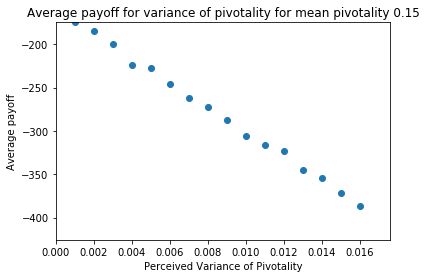

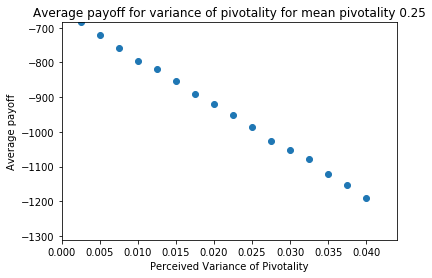

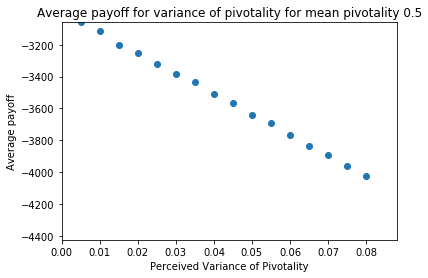

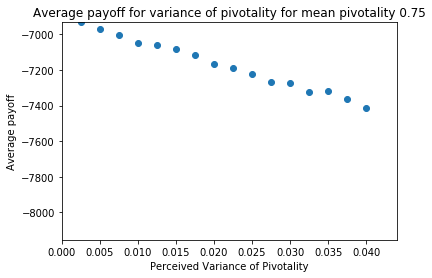

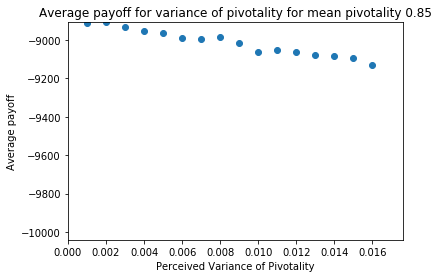

In [7]:
currentPivotality = 0
variances = []
payoffs = []
for index, row in MeanVar.iterrows():
    if row['marginal-pivotality'] != currentPivotality:
        if currentPivotality:
            plt.scatter(variances, payoffs)
            plt.axis([0, max(variances) * 1.1, min(payoffs) * 1.1, max(payoffs) ])
            plt.ylabel("Average payoff")
            plt.xlabel("Perceived Variance of Pivotality")
            plt.title("Average payoff for variance of pivotality for mean pivotality "+ str(currentPivotality))
            plt.show()
        currentPivotality = row['marginal-pivotality']
        variances = [round(row["variance-of-perceived-pivotality"],4)]
        payoffs = [row ['average payoff']]
    else:
        variances.append(round(row["variance-of-perceived-pivotality"],4))
        payoffs.append(row ['average payoff'])
        
plt.scatter(variances, payoffs)
plt.axis([0, max(variances) * 1.1, min(payoffs) * 1.1, max(payoffs) ])
plt.ylabel("Average payoff")
plt.xlabel("Perceived Variance of Pivotality")
plt.title("Average payoff for variance of pivotality for mean pivotality "+ str(currentPivotality))
plt.show()